<a href="https://colab.research.google.com/github/cicbeast/LSDSPT1-First-Project/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Let's do our imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from google.colab import files
import io
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression

%matplotlib inline

# Data Collection & Cleaning

In [2]:
# The dataset was downloaded from Kaggle.com and uploaded to github for ease of use
df = pd.read_csv('https://github.com/cicbeast/LSDSPT1-First-Project/blob/master/tipsters.csv?raw=true')
df.sample(15)

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive
24268,24269,928,Tipster X,29/05/2014,Bath,Bon Voyage,Win,6.0,Lose,True
18080,18081,139,Tipster R,16/02/2015,Lingfield,Boru’s Brook,Win,2.0,Win,True
31307,31308,1232,Tipster A1,24/09/2015,Pontefract,Master Of Finance,Win,4.5,Lose,True
6193,6194,1881,Tipster E,04/05/2015,Bath,Royal Warranty,Win,5.0,Lose,True
15614,15615,900,Tipster O,30/06/2016,Perth,Claragh Native,Win,21.0,Lose,True
18210,18211,269,Tipster R,16/03/2015,Taunton,Shy John,Win,5.5,Lose,True
19794,19795,1853,Tipster R,23/08/2016,Yarmouth,Aflame,Win,2.5,Win,True
35591,35592,72,Tipster D1,31/10/2014,Wolverhampton,Miguela Mcguire,Win,52.0,Lose,True
22644,22645,298,Tipster W,14/05/2015,York,Ribbons,Win,6.5,Lose,False
33244,33245,723,Tipster B1,22/11/2014,Haydock,Shotavodka,Win,9.0,Lose,False


In [3]:
df.shape

(38248, 10)

In [4]:
df['Tipster'] = df['Tipster'].str[-2:]
df['Tipster'] = df['Tipster'].str.strip()
df.head()

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,1,1,A,24/07/2015,Ascot,Fredricka,Win,8.00,Lose,True
1,2,2,A,24/07/2015,Thirsk,Spend A Penny,Win,4.50,Lose,True
2,3,3,A,24/07/2015,York,Straightothepoint,Win,7.00,Lose,True
3,4,4,A,24/07/2015,Newmarket,Miss Inga Sock,Win,5.00,Lose,True
4,5,5,A,25/07/2015,Ascot,Peril,Win,4.33,Win,True


In [5]:
# Let's get the dates in the universally accepted format
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,1,1,A,2015-07-24,Ascot,Fredricka,Win,8.00,Lose,True
1,2,2,A,2015-07-24,Thirsk,Spend A Penny,Win,4.50,Lose,True
2,3,3,A,2015-07-24,York,Straightothepoint,Win,7.00,Lose,True
3,4,4,A,2015-07-24,Newmarket,Miss Inga Sock,Win,5.00,Lose,True
4,5,5,A,2015-07-25,Ascot,Peril,Win,4.33,Win,True


In [6]:
# Let's change the Odds format from decimal to percentages
# Let's also adjust the column name
df['Odds'] = (1 /df['Odds']) * 100
df['Odds'] = df['Odds'].round(2)
df.rename({'Odds': 'Odds (%)'}, axis=1, inplace=True)

df.head()

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds (%),Result,TipsterActive
0,1,1,A,2015-07-24,Ascot,Fredricka,Win,12.50,Lose,True
1,2,2,A,2015-07-24,Thirsk,Spend A Penny,Win,22.22,Lose,True
2,3,3,A,2015-07-24,York,Straightothepoint,Win,14.29,Lose,True
3,4,4,A,2015-07-24,Newmarket,Miss Inga Sock,Win,20.00,Lose,True
4,5,5,A,2015-07-25,Ascot,Peril,Win,23.09,Win,True


In [7]:
# Let's reformat the Result Column also
df['Result'] = df['Result'].replace(['Win','Lose'], [1,0])
df.sample(15)

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds (%),Result,TipsterActive
6335,6336,2023,E,2015-03-06,Ripon,Argus,Win,23.09,1,True
19574,19575,1633,R,2016-06-20,Southwell,Sonneofpresenting,Win,20.00,0,True
31695,31696,1620,A1,2015-12-26,Huntingdon,Sonofagun,Win,16.67,1,True
15321,15322,607,O,2015-11-26,Chelmsford,Mishrif,Win,5.88,0,True
26235,26236,2895,X,2015-07-22,Naas,Al Mutawakkil,Win,12.50,0,True
10382,10383,648,J,2015-09-23,Redcar,Moccasin,Each Way,4.35,1,True
25073,25074,1733,X,2014-10-24,Newbury,Grevillea,Win,6.67,0,True
12996,12997,1079,L,2016-08-01,Lingfield,Boxing Shadows,Win,22.22,0,False
38104,38105,466,E1,2015-09-13,Longchamp,Beautiful Romance,Each Way,7.69,0,False
32177,32178,2102,A1,2016-09-06,Chantilly,Merchant Of Medici,Win,23.09,0,True


In [8]:
df['Bet Type'] = df['Bet Type'].str.capitalize()
df['Bet Type'].unique()

array(['Win', 'Each way'], dtype=object)

# Data Analysis

In [9]:
df.groupby(['Bet Type']).mean()

,UID,ID,Odds (%),Result,TipsterActive
Bet Type,,,,,
Each way,16981.619668,761.403831,7.593494,0.262069,0.622222
Win,19676.106056,1078.151818,17.182536,0.185121,0.667828


In [10]:
df.groupby(['Tipster']).mean()

,UID,ID,Odds (%),Result,TipsterActive
Tipster,,,,,
A,666.0,666.000000,21.016912,0.369647,True
A1,31299.5,1223.408831,13.110809,0.138594,True
B,1583.0,252.000000,14.567396,0.170974,True
B1,33771.0,1249.110132,26.232315,0.274329,False
C,2703.5,869.500000,10.607946,0.245109,False
C1,35270.0,251.000000,16.593373,0.217565,False
D,3943.0,371.000000,7.731687,0.129555,True
D1,36580.0,1060.000000,6.874285,0.164228,True
E,6163.5,1850.500000,24.108762,0.253784,True


In [11]:
# We should make sure that none of our tipsters have insignificantly small data 
df.groupby(['Tipster']).count()['UID']

Tipster
A     1331
A1    2446
B      503
B1    2497
C     1738
C1     501
D      741
D1    2119
E     3700
E1     609
F      146
G      290
H      833
I      453
J     1937
K      246
L     1425
M      957
N      415
O     1094
P      581
Q     1552
R     1901
S      383
T     1332
U      383
V      406
W      994
X     4383
Y     1469
Z      883
Name: UID, dtype: int64

In [12]:
df.groupby(['Tipster']).mean()['Odds (%)']

Tipster
A     21.016912
A1    13.110809
B     14.567396
B1    26.232315
C     10.607946
C1    16.593373
D      7.731687
D1     6.874285
E     24.108762
E1    16.954384
F     15.189452
G      5.436517
H      9.416279
I     15.295298
J     10.702550
K     21.749472
L     14.455663
M     16.960575
N     16.309133
O      6.613985
P     17.322186
Q     14.087249
R     25.402525
S     13.765744
T      9.771119
U     11.592167
V     10.014877
W      9.713753
X     11.475469
Y     14.749108
Z     21.016512
Name: Odds (%), dtype: float64

In [13]:
df.groupby(['Tipster']).mean()['Odds (%)'].sort_values()

Tipster
G      5.436517
O      6.613985
D1     6.874285
D      7.731687
H      9.416279
W      9.713753
T      9.771119
V     10.014877
C     10.607946
J     10.702550
X     11.475469
U     11.592167
A1    13.110809
S     13.765744
Q     14.087249
L     14.455663
B     14.567396
Y     14.749108
F     15.189452
I     15.295298
N     16.309133
C1    16.593373
E1    16.954384
M     16.960575
P     17.322186
Z     21.016512
A     21.016912
K     21.749472
E     24.108762
R     25.402525
B1    26.232315
Name: Odds (%), dtype: float64

In [14]:
df.groupby(['Tipster']).groups.keys()

dict_keys(['A', 'A1', 'B', 'B1', 'C', 'C1', 'D', 'D1', 'E', 'E1', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

In [15]:
df.groupby(['Tipster']).mean()['Result']

Tipster
A     0.369647
A1    0.138594
B     0.170974
B1    0.274329
C     0.245109
C1    0.217565
D     0.129555
D1    0.164228
E     0.253784
E1    0.262726
F     0.280822
G     0.224138
H     0.104442
I     0.236203
J     0.163655
K     0.264228
L     0.165614
M     0.275862
N     0.303614
O     0.079525
P     0.208262
Q     0.155284
R     0.327722
S     0.206266
T     0.106607
U     0.198433
V     0.091133
W     0.102616
X     0.146475
Y     0.194010
Z     0.294451
Name: Result, dtype: float64

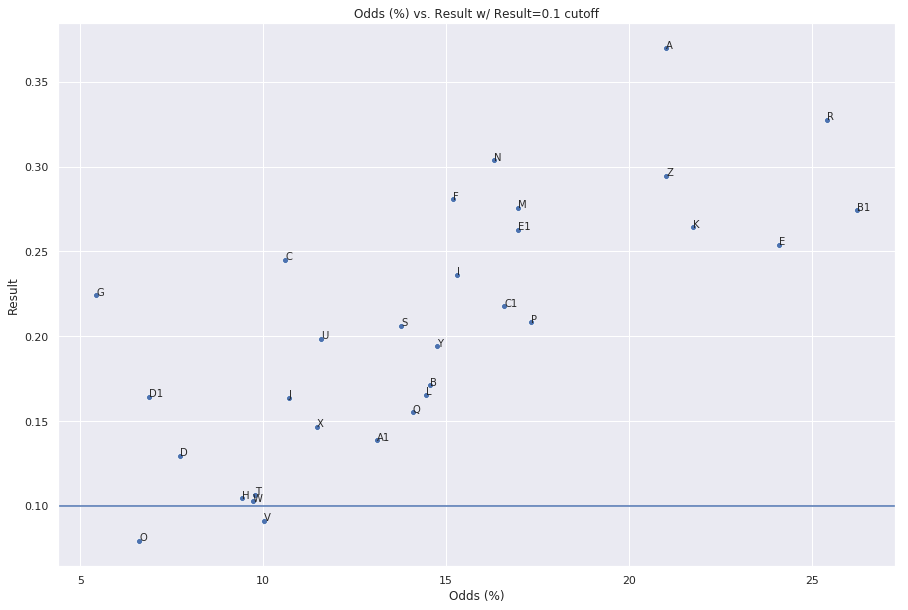

In [16]:
# Let's plot our Tipster's mean Odds and Results
tipsodds = df.groupby(['Tipster']).mean()['Odds (%)']
tipsresult = df.groupby(['Tipster']).mean()['Result']
tipsname = df.groupby(['Tipster']).groups.keys()
plt.figure(figsize=(15,10 ))
plt.title('Odds (%) vs. Result w/ Result=0.1 cutoff')
ax = sns.scatterplot(tipsodds, tipsresult, )
# Average of 10 horses per race based on 06/27/19 UK racing info
plt.axhline(.1, 0, 1)
# I also want to be able to see which Tipster is represented by each point
for i, txt in enumerate(tipsname):
    ax.annotate(txt, (tipsodds[i], tipsresult[i]))



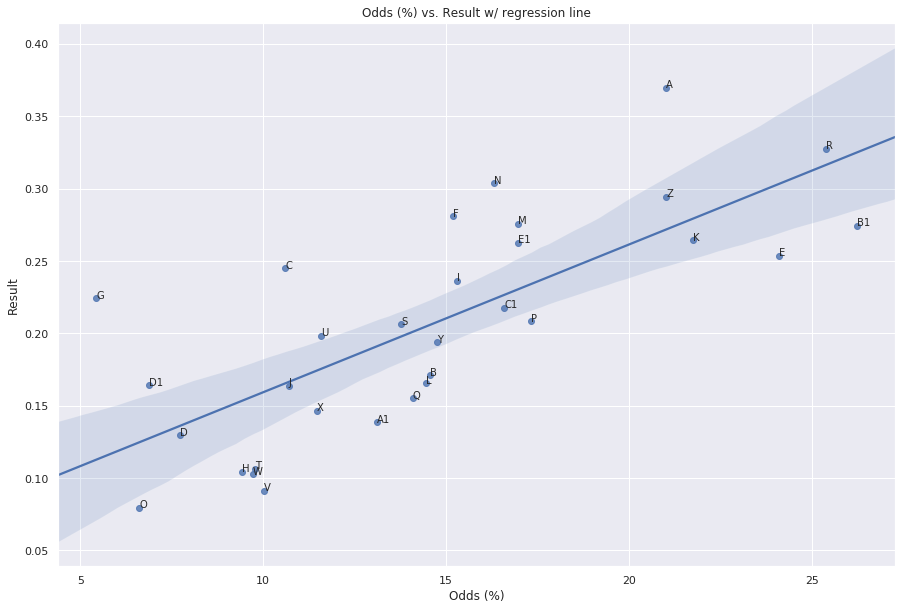

In [39]:
# Now let's plot see this plot with a regression line
plt.figure(figsize=(15,10 ))
plt.title('Odds (%) vs. Result w/ regression line')
ax = sns.regplot(x="Odds (%)", y="Result", data=df.groupby(['Tipster']).mean(), ci= 95);

for i, txt in enumerate(tipsname):
    ax.annotate(txt, (tipsodds[i], tipsresult[i]))

In [18]:
# Let's Create a new column to to show potential winnings
df['$100 Bet wins:'] = 10000/df['Odds (%)']*df['Result']
df['$100 Bet wins:'] = df['$100 Bet wins:'].round(2)
df.head()

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds (%),Result,TipsterActive,$100 Bet wins:
0,1,1,A,2015-07-24,Ascot,Fredricka,Win,12.50,0,True,0.00
1,2,2,A,2015-07-24,Thirsk,Spend A Penny,Win,22.22,0,True,0.00
2,3,3,A,2015-07-24,York,Straightothepoint,Win,14.29,0,True,0.00
3,4,4,A,2015-07-24,Newmarket,Miss Inga Sock,Win,20.00,0,True,0.00
4,5,5,A,2015-07-25,Ascot,Peril,Win,23.09,1,True,433.09


In [19]:
# Now let's take a look at the means again
df.groupby(['Tipster']).mean()

,UID,ID,Odds (%),Result,TipsterActive,$100 Bet wins:
Tipster,,,,,,
A,666.0,666.000000,21.016912,0.369647,True,249.064763
A1,31299.5,1223.408831,13.110809,0.138594,True,144.378692
B,1583.0,252.000000,14.567396,0.170974,True,155.619980
B1,33771.0,1249.110132,26.232315,0.274329,False,107.521145
C,2703.5,869.500000,10.607946,0.245109,False,325.243861
C1,35270.0,251.000000,16.593373,0.217565,False,154.285230
D,3943.0,371.000000,7.731687,0.129555,True,203.165884
D1,36580.0,1060.000000,6.874285,0.164228,True,313.591454
E,6163.5,1850.500000,24.108762,0.253784,True,108.897576


<Figure size 1080x720 with 0 Axes>

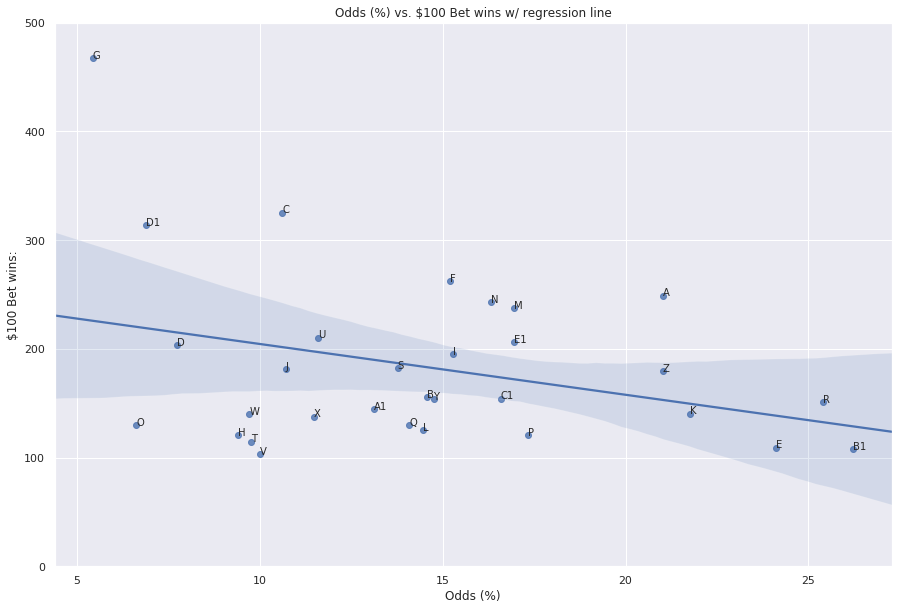

<Figure size 1080x720 with 0 Axes>

In [40]:
# Now let's plot Odds vs $100 Bet wins
# Let's plot our Tipster's mean Odds and Results
tipsodds = df.groupby(['Tipster']).mean()['Odds (%)']
tipswins = df.groupby(['Tipster']).mean()['$100 Bet wins:']
tipsname = df.groupby(['Tipster']).groups.keys()
plt.figure(figsize=(15,10 ))
ax = sns.regplot(x="Odds (%)", y="$100 Bet wins:", data=df.groupby(['Tipster']).mean(), ci=95);
plt.title('Odds (%) vs. $100 Bet wins w/ regression line')
# I also want to be able to see which Tipster is represented by each point
for i, txt in enumerate(tipsname):
    ax.annotate(txt, (tipsodds[i], tipswins[i]))
# Now Let's plot a line for the betting at random
plt.ylim(0, 500)
plt.figure(figsize=(15,10 ))



# Nonessential Code Cells

In [53]:
df['Horselen'] = df['Horse'].apply(len)
df.head()

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds (%),Result,TipsterActive,$100 Bet wins:,Horselen
0,1,1,A,2015-07-24,Ascot,Fredricka,Win,12.50,0,True,0.00,9
1,2,2,A,2015-07-24,Thirsk,Spend A Penny,Win,22.22,0,True,0.00,13
2,3,3,A,2015-07-24,York,Straightothepoint,Win,14.29,0,True,0.00,17
3,4,4,A,2015-07-24,Newmarket,Miss Inga Sock,Win,20.00,0,True,0.00,14
4,5,5,A,2015-07-25,Ascot,Peril,Win,23.09,1,True,433.09,5


In [54]:
df.groupby(['Result']).mean()['Horselen']

Result
0    11.242500
1    11.133672
Name: Horselen, dtype: float64

In [21]:
# Let's separate tipster A as an example
dfA = df[df['Tipster'] == 'A']
dfA = dfA.drop(['UID', 'ID'], axis=1)

dfA.tail(10)

,Tipster,Date,Track,Horse,Bet Type,Odds (%),Result,TipsterActive,$100 Bet wins:
1321,A,2016-04-09,Fontwell,Mysterious Man,Win,30.30,0,True,0.00
1322,A,2016-04-09,Dundalk,Sapphirine,Each way,15.38,0,True,0.00
1323,A,2016-05-09,Galway,Cairdiuil,Each way,20.00,1,True,500.00
1324,A,2016-05-09,Galway,Morga,Each way,9.09,1,True,1100.11
1325,A,2016-06-09,Redcar,Our Boy John,Each way,16.67,0,True,0.00
1326,A,2016-06-09,Galway,Tocororo,Win,36.36,1,True,275.03
1327,A,2016-07-09,Uttoxeter,Skylander,Each way,28.57,0,True,0.00
1328,A,2016-07-09,Doncaster,Andok,Win,80.00,1,True,125.00
1329,A,2016-07-09,Carlisle,Little Lady Katie,Each way,6.25,0,True,0.00
1330,A,2016-07-09,Kempton,All the rage,Win,80.00,0,True,0.00


In [22]:
dftrack = df[df['Date'] == '2016-06-16']
dftrack[dftrack['Track'] == 'Ascot']

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds (%),Result,TipsterActive,$100 Bet wins:
1004,1005,1005,A,2016-06-16,Ascot,Blue De Vega,Each way,16.67,0,True,0.00
1005,1006,1006,A,2016-06-16,Ascot,Clever Cookie,Each way,7.69,0,True,0.00
1006,1007,1007,A,2016-06-16,Ascot,Pacodali,Each way,1.96,0,True,0.00
1007,1008,1008,A,2016-06-16,Ascot,Defrocked,Each way,9.09,1,True,1100.11
1008,1009,1009,A,2016-06-16,Ascot,Shraaoh,Each way,18.18,0,True,0.00
1573,1574,243,B,2016-06-16,Ascot,Fighting Temeraire,Win,7.69,0,True,0.00
3526,3527,1693,C,2016-06-16,Ascot,Legendary Lunch,Each way,9.09,0,False,0.00
3527,3528,1694,C,2016-06-16,Ascot,Hawkbill,Each way,12.50,1,False,800.00
3528,3529,1695,C,2016-06-16,Ascot,Sovereign Parade,Each way,9.09,0,False,0.00
3529,3530,1696,C,2016-06-16,Ascot,Mustashry,Each way,6.67,0,False,0.00


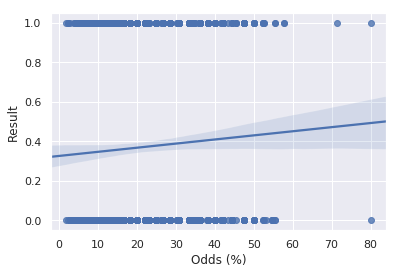

In [23]:
sns.regplot(x="Odds (%)", y="Result", data=dfA)

In [24]:
# df.groupby(['Tipster'] == ['Tipster A']).head()
df[df['Tipster'] == 'Tipster A'].head()

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds (%),Result,TipsterActive,$100 Bet wins:


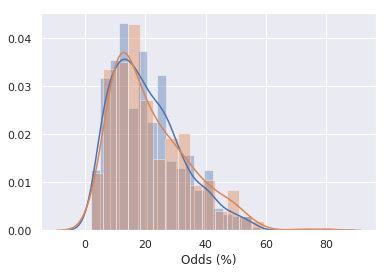

In [25]:
sns.distplot(dfA[dfA['Result']==0]['Odds (%)']);
sns.distplot(dfA[dfA['Result']==1]['Odds (%)']);

In [26]:
print(df['Track'].nunique())
print(df['Track'].unique())

116
['Ascot' 'Thirsk' 'York' 'Newmarket' 'Newcastle' 'Lingfield' 'Carlisle'
 'Pontefract' 'Uttoxeter' 'Hamilton' 'Chepstow' 'Salisbury' 'Catterick'
 'Chelmsford' 'Brighton' 'Wolverhampton' 'Newbury' 'Market Rasen'
 'Tramore' 'Leicester' 'Ffos Las' 'Worcester' 'Sandown' 'Deauville'
 'Curragh' 'Stratford' 'Goodwood' 'Beverley' 'Doncaster' 'Chester'
 'Leopardstown' 'Bath' 'Yarmouth' 'Ayr' 'Kempton' 'Haydock' 'Nottingham'
 'Dundalk' 'Sedgefield' 'Huntingdon' 'Wetherby' 'Wincanton' 'Fakenham'
 'Cork' 'Naas' 'Windsor' 'Exeter' 'Galway' 'Navan' 'Ludlow' 'Cheltenham'
 'Aintree' 'Listowel' 'Limerick' 'Plumpton' 'Warwick' 'Thurles'
 'Towcester' 'Musselburgh' 'Hexham' 'Taunton' 'Punchestown' 'Fontwell'
 'SouthWell' 'Fairyhouse' 'Bangor' 'Tipperary' 'Longchamp' 'Meydan'
 'Gowran Park' 'Cartmel' 'Down Royal' 'Kelso' 'Downpatrick' 'Ripon'
 'Epsom' 'Perth' 'Sligo' 'Ballinrobe' 'Clonmel' 'Auteuil' 'Kilbeggan'
 'Newton Abbot' 'Roscommon' 'Dundee' 'Killarney' 'Southwell' 'Bellewstown'
 'Redcar' 'Arlingt

In [27]:
print(df['Horse'].nunique())

15791


In [0]:
# df['Tipster'] = df['Tipster'].str.replace('Tipster ','Tipster_')

# df.head()

In [0]:
# for tip in tipdict1:
#   tipdict1[tip] = df[df['Tipster'] == tip]
  
#   Tipster_C.head()

In [0]:
# tipdict1 =  { "df"+uni[i][-1] : uni[i] for i in range(0, 26 ) }    
# tipdict2 =  { "df"+uni[j][-2:] : uni[j] for j in range(26, 31 ) }    

# tipdict1, tipdict2

In [31]:
# Let's try to find all of the active Tipsters
# First we'll separate them
dfact = df[df['TipsterActive']==True]
dfinact = df[df['TipsterActive']==False]

dfact.sample(10), dfinact.sample(10)

(         UID    ID Tipster  ... Result TipsterActive $100 Bet wins:
 277      278   278       A  ...      0          True           0.00
 32365  32366  2289      A1  ...      0          True           0.00
 8163    8164     5       G  ...      1          True        1300.39
 22137  22138   197       V  ...      0          True           0.00
 5887    5888  1575       E  ...      0          True           0.00
 8267    8268   109       G  ...      1          True        1700.68
 36001  36002   482      D1  ...      0          True           0.00
 20184  20185   342       S  ...      1          True         599.88
 18129  18130   188       R  ...      0          True           0.00
 26434  26435  3094       X  ...      1          True         699.79
 
 [10 rows x 11 columns],
          UID    ID Tipster  ... Result TipsterActive $100 Bet wins:
 33524  33525  1003      B1  ...      0         False           0.00
 8861    8862   413       H  ...      0         False           0.00
 34275 

In [32]:
# Now let's find the specific tipsters
act_tip = dfact['Tipster'].unique()
inact_tip = dfinact['Tipster'].unique()

print('Active Tipsters: ', act_tip)
print('Inactive Tipsters: ', inact_tip)

Active Tipsters:  ['A' 'B' 'D' 'E' 'G' 'I' 'J' 'K' 'M' 'O' 'P' 'R' 'S' 'T' 'U' 'V' 'X' 'A1'
 'D1']
Inactive Tipsters:  ['C' 'F' 'H' 'L' 'N' 'Q' 'W' 'Y' 'Z' 'B1' 'C1' 'E1']


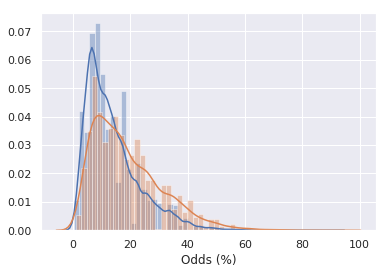

In [33]:
# sns.distplot(np.log10(dfact['Odds (%)']))
sns.distplot(dfact[dfact['Result']==0]['Odds (%)']);
sns.distplot(dfact[dfact['Result']==1]['Odds (%)']);

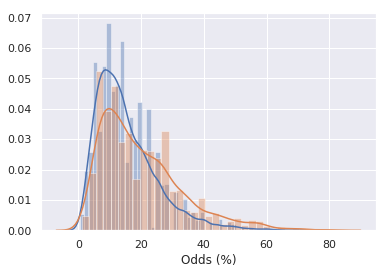

In [34]:
sns.distplot(dfinact[dfinact['Result']==0]['Odds (%)']);
sns.distplot(dfinact[dfinact['Result']==1]['Odds (%)']);

In [35]:
dfact['Result'].mean(), dfinact['Result'].mean()

(0.19554514412768997, 0.21114683815648447)

In [36]:
dfA['Result'].mean()

0.36964688204357626

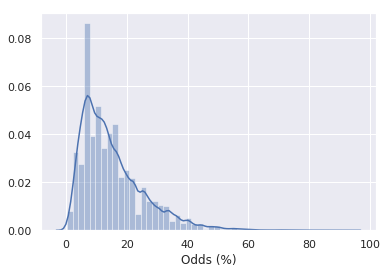

In [37]:
sns.distplot(df['Odds (%)'])

In [38]:
# Let's separate tipster A as an example
dfB = df[df['Tipster'] == 'Tipster B']

dfB.tail(10)

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds (%),Result,TipsterActive,$100 Bet wins:
